<a href="https://colab.research.google.com/github/huxe/Machine-learning/blob/master/cnn_singnature.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [93]:
import tensorflow.keras.layers as Layers
import tensorflow.keras.activations as Actications
import tensorflow.keras.models as Models
import tensorflow.keras.optimizers as Optimizer
import tensorflow.keras.metrics as Metrics
import tensorflow.keras.utils as Utils
from keras.utils.vis_utils import model_to_dot
import os
import matplotlib.pyplot as plot
import cv2
import numpy as np
from sklearn.utils import shuffle
from sklearn.metrics import confusion_matrix as CM
from random import randint
from IPython.display import SVG
import matplotlib.gridspec as gridspec
import matplotlib.pyplot as plt

In [94]:
def get_images(directory):
    Images = []
    Labels = []  # 0 for Building , 1 for forest, 2 for glacier, 3 for mountain, 4 for Sea , 5 for Street
    label = 0
    
    for labels in os.listdir("/content/drive/My Drive/prac/test"): #Main Directory where each class label is present as folder name.
        if labels == 'p1': #Folder contain Glacier Images get the '2' class label.
            label = 0
        elif labels == 'p2':
            label = 1
        elif labels == 'p3':
            label = 2
        # elif labels == 'p4':
        #     label = 3
        # elif labels == 'p5':
        #     label = 4
        # elif labels == 'p6':
        #     label = 6
        # elif labels == 'p7':
        #     label = 7
        # elif labels == 'p8':
        #     label = 8
        # elif labels == 'p9':
        #     label = 9
        # elif labels == 'p10':
        #     label = 10
        # elif labels == 'p11':
        #     label = 11
        # elif labels == 'p12':
        #     label = 12
        # elif labels == 'p13':
        #     label = 13
        # elif labels == 'p14':
        #     label = 14
        # elif labels == 'p15':
        #     label = 15
        
        for image_file in os.listdir(directory+labels): #Extracting the file name of the image from Class Label folder
            image = cv2.imread(directory+labels+r'/'+image_file) #Reading the image (OpenCV)
#             image=imageMorf(image)
            image = cv2.resize(image,(300,150)) #Resize the image, Some images are different sizes. (Resizing is very Important)
            
            Images.append(image)
            Labels.append(label)
    
    return shuffle(Images,Labels,random_state=817328462) #Shuffle the dataset you just prepared.

def get_classlabel(class_code):
    # labels = {1:'p1', 2:'p2', 3:'p3', 4:'p4', 5:'p5', 6:'p6',7:'p7', 8:'p8', 12:'p12', 9:'p9', 10:'p10', 11:'p11', 13:'p13', 14:'p14', 15:'p15'}
    labels = {0:'p1', 1:'p2', 2:'p3'}
    return labels[class_code]

In [95]:
Images, Labels = get_images('/content/drive/My Drive/prac/train/') #Extract the training images from the folders.

Images = np.array(Images) #converting the list of images to numpy array.
Labels = np.array(Labels)

In [96]:
print("Shape of Images:",Images.shape)
print("Shape of Labels:",Labels.shape)

Shape of Images: (69, 150, 300, 3)
Shape of Labels: (69,)


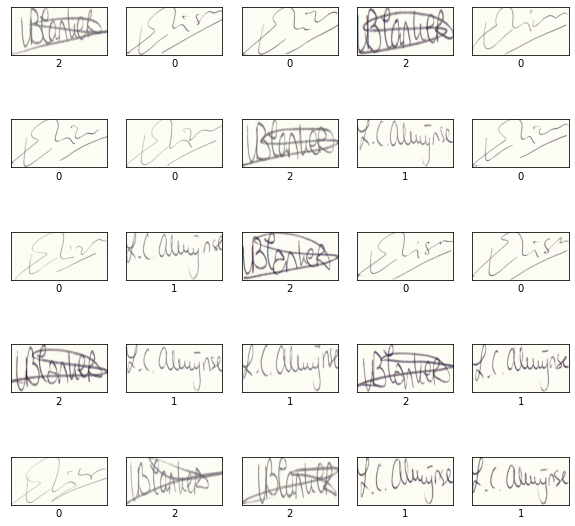

In [97]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(Images[i], cmap=plt.cm.binary)
    plt.xlabel(Labels[i])
plt.show()

In [98]:
model = Models.Sequential()

model.add(Layers.Conv2D(350,kernel_size=(3,3),activation='relu',input_shape=(300,150,3)))
model.add(Layers.Conv2D(300,kernel_size=(3,3),activation='relu'))
model.add(Layers.Conv2D(180,kernel_size=(3,3),activation='relu'))
model.add(Layers.MaxPool2D(5,5))
model.add(Layers.Conv2D(180,kernel_size=(3,3),activation='relu'))
model.add(Layers.Conv2D(140,kernel_size=(3,3),activation='relu'))
model.add(Layers.Conv2D(100,kernel_size=(3,3),activation='relu'))
model.add(Layers.Conv2D(50,kernel_size=(3,3),activation='relu'))
model.add(Layers.MaxPool2D(5,5))
model.add(Layers.Flatten())
model.add(Layers.Dense(180,activation='relu'))
model.add(Layers.Dense(100,activation='relu'))
model.add(Layers.Dense(50,activation='relu'))
model.add(Layers.Dropout(rate=0.5))
model.add(Layers.Dense(3,activation='softmax'))

model.compile(optimizer=Optimizer.Adam(lr=0.0001),loss='sparse_categorical_crossentropy',metrics=['accuracy'])

model.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_51 (Conv2D)           (None, 298, 148, 350)     9800      
_________________________________________________________________
conv2d_52 (Conv2D)           (None, 296, 146, 300)     945300    
_________________________________________________________________
conv2d_53 (Conv2D)           (None, 294, 144, 180)     486180    
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 58, 28, 180)       0         
_________________________________________________________________
conv2d_54 (Conv2D)           (None, 56, 26, 180)       291780    
_________________________________________________________________
conv2d_55 (Conv2D)           (None, 54, 24, 140)       226940    
_________________________________________________________________
conv2d_56 (Conv2D)           (None, 52, 22, 100)      

In [99]:
trained = model.fit(Images,Labels,epochs=150,validation_split=0.3)

Epoch 1/150
2/2 [==============================] - 30s 15s/step - loss: 5.5904 - accuracy: 0.3958 - val_loss: 1.4510 - val_accuracy: 0.3810
Epoch 2/150
2/2 [==============================] - 3s 2s/step - loss: 2.3968 - accuracy: 0.2083 - val_loss: 1.0883 - val_accuracy: 0.3810
Epoch 3/150
2/2 [==============================] - 3s 2s/step - loss: 1.8643 - accuracy: 0.3542 - val_loss: 1.1467 - val_accuracy: 0.2857
Epoch 4/150
2/2 [==============================] - 3s 2s/step - loss: 1.5109 - accuracy: 0.4167 - val_loss: 1.1917 - val_accuracy: 0.3810
Epoch 5/150
2/2 [==============================] - 3s 2s/step - loss: 1.4403 - accuracy: 0.3750 - val_loss: 1.0021 - val_accuracy: 0.4286
Epoch 6/150
2/2 [==============================] - 3s 2s/step - loss: 1.1680 - accuracy: 0.3750 - val_loss: 1.1250 - val_accuracy: 0.2381
Epoch 7/150
2/2 [==============================] - 3s 2s/step - loss: 1.0989 - accuracy: 0.4792 - val_loss: 1.1895 - val_accuracy: 0.2857
Epoch 8/150
2/2 [===============

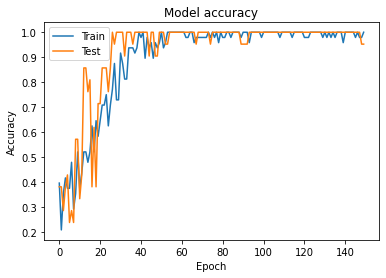

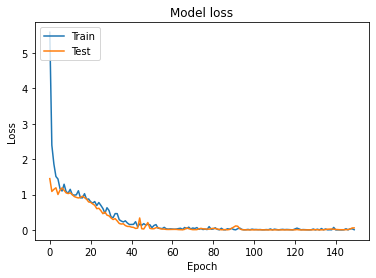

In [100]:
plot.plot(trained.history['accuracy'])
plot.plot(trained.history['val_accuracy'])
plot.title('Model accuracy')
plot.ylabel('Accuracy')
plot.xlabel('Epoch')
plot.legend(['Train', 'Test'], loc='upper left')
plot.show()

plot.plot(trained.history['loss'])
plot.plot(trained.history['val_loss'])
plot.title('Model loss')
plot.ylabel('Loss')
plot.xlabel('Epoch')
plot.legend(['Train', 'Test'], loc='upper left')
plot.show()

In [101]:
test_images,test_labels = get_images('/content/drive/My Drive/prac/test/')

test_images = np.array(test_images)
# test_images = cv2.resize(test_images,(300,150))
test_labels = np.array(test_labels)
model.evaluate(test_images,test_labels, verbose=1)

1/1 [==============================] - 0s 1ms/step - loss: 0.0022 - accuracy: 1.0000


[0.0022073136642575264, 1.0]

In [102]:
test_images.shape

(3, 150, 300, 3)

In [103]:
test_labels

array([1, 2, 0])

In [104]:
predictions=model.predict_classes (test_images ,batch_size=32,verbose=0)

In [105]:
predictions

array([1, 2, 0])

In [107]:
np.argmin(predictions[1])

0

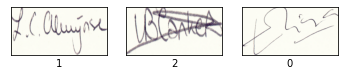

In [111]:
plt.figure(figsize=(10,10))
for i in range(3):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(test_images[i], cmap=plt.cm.binary)
    plt.xlabel((predictions[i]))
plt.show()